In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [5]:
iris_data = pd.read_csv("data/iris.csv")
iris_data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
s_ns = lambda x: "s" if x=="setosa" else "ns" 
iris_data["s_ns"] = iris_data["Species"].apply(s_ns)

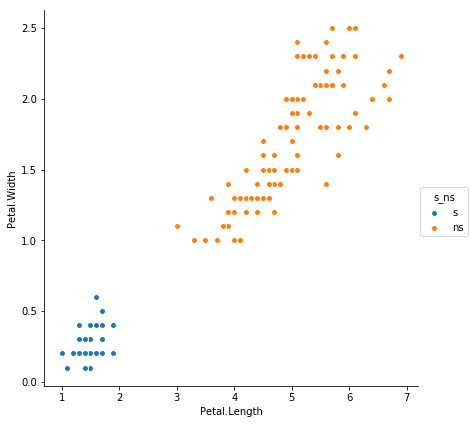

In [18]:
import seaborn as sns
sns.pairplot(iris_data,
             x_vars = "Petal.Length",y_vars="Petal.Width",
             hue="s_ns",size=6)

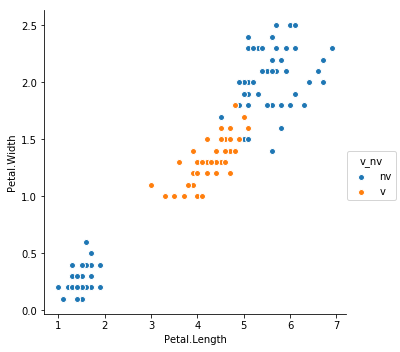

In [26]:
v_nv = lambda x: "v" if x=="versicolor" else "nv" 
iris_data["v_nv"] = iris_data["Species"].apply(v_nv)
sns.pairplot(iris_data,
             x_vars = "Petal.Length",y_vars="Petal.Width",
             hue="v_nv",size=5)

 To view the decision regions of the classifier we are using mlxtend.
 To install the mlxtend package on conda you can use the below command.
 conda install mlxtend --channel conda-forge
 You can also use pip install mlxtend if you are not installing into conda env.

In [ ]:
# this encoding is in preparation to plotting the decision regions
iris_data.loc[iris_data.v_nv=="v","v_nv"] = 0
iris_data.loc[iris_data.v_nv=="nv","v_nv"] = 1
features = ["Petal.Length","Petal.Width"]
target = ["v_nv"]

In [72]:
from sklearn.svm import SVC
model = SVC(kernel="rbf")
model.fit(iris_data[features],iris_data[target])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Text(0.5,1,'Decision boundary of SVM RBF kernel on iris data')

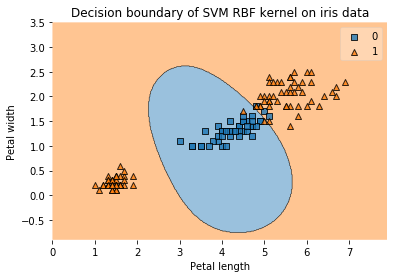

In [78]:
from mlxtend.plotting import plot_decision_regions
X = np.array(iris_data[features])
y = np.array(iris_data[target]).ravel()
plot_decision_regions(X,y,clf=model)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title('Decision boundary of SVM RBF kernel on iris data')

### SVM model on iris data for multi class classification

Text(0.5,1,'Multiclass classification on iris using SVM')

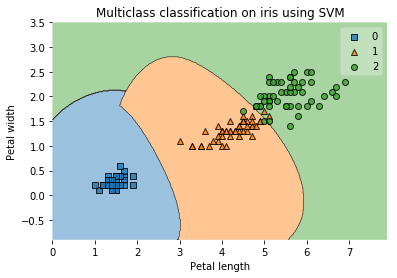

In [80]:
iris_data.loc[iris_data.Species=="setosa","Species"] = 0
iris_data.loc[iris_data.Species=="versicolor","Species"] = 1
iris_data.loc[iris_data.Species=="virginica","Species"] = 2
iris_data.Species = iris_data.Species.astype("category")
features = ["Petal.Length","Petal.Width"]
target = ["Species"]
model = SVC(kernel="rbf")
model.fit(iris_data[features],iris_data[target])
X = np.array(iris_data[features])
y = np.array(iris_data[target]).ravel()
plot_decision_regions(X,y,clf=model)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title('Multiclass classification on iris using SVM')